C:\Users\kian3\AppData\Local\Temp\ipykernel_35612\3181889040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_intake['start'] = pd.to_datetime(df_filtered_intake['start']).dt.date
C:\Users\kian3\AppData\Local\Temp\ipykernel_35612\3181889040.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_intake['hourly_intake'] = df_filtered_intake.groupby(['pig', 'start', 'hour'])['intake'].transform('sum')


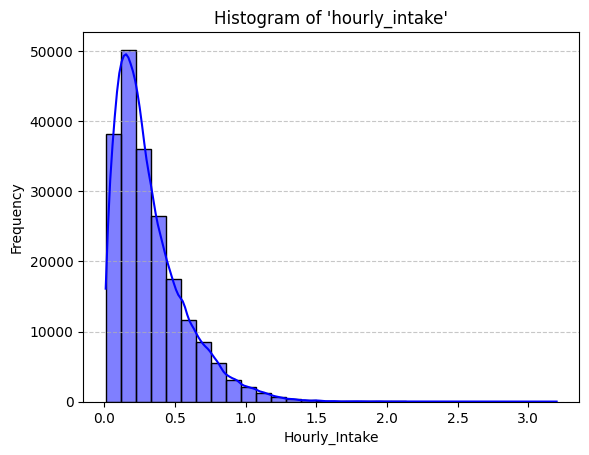

unique pig hour count is 2639
pig
222000938269    23
Name: hour, dtype: int64


In [ ]:
import marimo as mo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load both datasets
data = pd.read_csv(r"C:\Users\kian3\Datavis\Project\Data\Exp1 - Feeding data.csv")
data = data[data['pig'] != 0]
pen = pd.read_csv(r"C:\Users\kian3\Datavis\Project\Data\Exp1 - Pig registration all info combined.csv")

#Check and count the number of unique pigs in both datasets
common_pigs = data[data['pig'].isin(pen['pig'])]
unique_pigs_count = common_pigs['pig'].nunique()

# Merge the two datasets on the 'pig' column
merged_data = pd.merge(common_pigs, pen, on='pig')
merged_time_sorted = merged_data.sort_values(by=['pig', 'start'])

#Check number of unique pigs
row_count = merged_time_sorted.shape[0]

#Select only positive values for intake
df_filtered_intake = merged_time_sorted[(merged_time_sorted['intake'] > 0)]

#Extract the date and drop the time part
df_filtered_intake['start'] = pd.to_datetime(df_filtered_intake['start']).dt.date

#Calculate the hourly intake per pig, day and hour
df_filtered_intake['hourly_intake'] = df_filtered_intake.groupby(['pig', 'start', 'hour'])['intake'].transform('sum')

#histogram and curve for the hourly intake
sns.histplot(df_filtered_intake['hourly_intake'], bins=30, kde=True, color='blue')
plt.title("Histogram of 'hourly_intake'")
plt.xlabel("Hourly_Intake")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Only keep one row per pig, day and hour
df_filtered_intake = df_filtered_intake.drop_duplicates(subset=['pig', 'start', 'hour', 'hourly_intake'])

#Calculate the normalized hourly intake per pig and hour, meaning the sum devided by the number of days of the experiment (94 days)
df_filtered_intake['normalized_hourly_intake'] = df_filtered_intake.groupby(['pig', 'hour'])['hourly_intake'].transform('sum') / 94
df_filtered_intake_sorted = df_filtered_intake.sort_values(by=['pig', 'hour'])

#Keep one instances per pig and hour
df_unique_pig_hourly = df_filtered_intake_sorted.drop_duplicates(subset=['pig', 'hour', 'normalized_hourly_intake'])
unique_pig_hour_count=df_unique_pig_hourly.shape[0]
print(f"unique pig hour count is {unique_pig_hour_count}")

#1 pig/hour count short -> check which pig misses one
hour_count_per_pig = df_unique_pig_hourly.groupby('pig')['hour'].nunique()
pig_with_missing_hour = hour_count_per_pig[hour_count_per_pig != 24]
print(pig_with_missing_hour)

#222000938269 has one hour missing, check which one: see cell below, never at 9. Reason: died before end of study (december 14 2020, already 10 days after start study)

#Keep only columns needed for first svg (only normalized feeding pattern)
df_first_svg = df_unique_pig_hourly[['pig', 'hour', 'normalized_hourly_intake']]

In [ ]:
# Load both datasets
data = pd.read_csv(r"C:\Users\kian3\Datavis\Project\Data\Exp1 - Feeding data.csv")
data = data[data['pig'] != 0]
pen = pd.read_csv(r"C:\Users\kian3\Datavis\Project\Data\Exp1 - Pig registration all info combined.csv")

#Check and count the number of unique pigs in both datasets
common_pigs = data[data['pig'].isin(pen['pig'])]
unique_pigs_count = common_pigs['pig'].nunique()

# Merge the two datasets on the 'pig' column
merged_data = pd.merge(common_pigs, pen, on='pig', how='inner')
merged_time_sorted = merged_data.sort_values(by=['pig', 'hour'])
merged_time_sorted_222000938269 = merged_time_sorted[merged_time_sorted['pig'] == 222000938269]
unique_hours = merged_time_sorted_222000938269['hour'].unique()
print(f"Unique hours for pig 222000938269: {unique_hours}")

#check 222000938269: reason for missing hour is that he died before end of study (has no end body weight)
merged_time_sorted_222000938269.to_excel(r"C:\Users\kian3\Datavis\Project\Data\222000938269.xlsx", index=False)

Unique hours for pig 222000938269: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
